In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set environment variables
import os

os.environ["SCAL_TYPE"] = "real"
os.environ["PRECISION"] = "double"
os.environ["MY_NUMBA_TARGET"] = "numba"

# Add cle_fun to PYTHON_PATH
import sys
sys.path.append("../../clonscal")

In [7]:
from simulation.cl_simulation import ComplexLangevinSimulation
from simulation.config import Config

config = Config(dims=[100], dt = 0.1, mass_real = -1, interaction=0.4)
sim = ComplexLangevinSimulation(config)

In [8]:
from src.utils import KernelBridge
from src.utils import noise_kernel, evolve_kernel, mexican_hat_kernel_real

kernel_br = KernelBridge(sim, [noise_kernel, evolve_kernel, mexican_hat_kernel_real], const_param={})
n_steps = int(1e4)
phi = np.empty(n_steps)

args = kernel_br.get_current_params()
for k in range(n_steps):
    sim.update_noise(noise_kernel, *args[noise_kernel].values())
    sim.update_drift(mexican_hat_kernel_real, *args[mexican_hat_kernel_real].values())
    args = kernel_br.get_current_params()
    sim.update_field(evolve_kernel, *args[evolve_kernel].values())
    sim.swap()
    phi[k] = sim.phi1[0] 


In [9]:
from typing import Dict, Any
const_param: Dict[str, Any] = {}
const_param['constant_param_1'] = 42


(array([  1.,   1.,   1.,   0.,   1.,   2.,   3.,   7.,   8.,  14.,  25.,
         29.,  68.,  97., 113., 118., 157., 207., 213., 250., 298., 290.,
        358., 349., 370., 372., 342., 309., 246., 269., 224., 221., 162.,
        160., 127.,  88., 103.,  63.,  61.,  60.,  49.,  37.,  24.,  21.,
         22.,  16.,  11.,  18.,  13.,   9.,   5.,  12.,   7.,   6.,   8.,
         10.,  12.,   8.,  16.,  14.,   9.,  10.,  20.,  20.,  24.,  29.,
         49.,  43.,  56.,  67.,  73.,  98., 104., 132., 117., 149., 173.,
        182., 223., 214., 228., 232., 219., 230., 200., 178., 149., 159.,
        124.,  93.,  91.,  73.,  43.,  36.,  15.,  11.,   9.,  11.,   0.,
          2.]),
 array([-6.87162942e+00, -6.74191923e+00, -6.61220904e+00, -6.48249884e+00,
        -6.35278865e+00, -6.22307846e+00, -6.09336827e+00, -5.96365808e+00,
        -5.83394788e+00, -5.70423769e+00, -5.57452750e+00, -5.44481731e+00,
        -5.31510712e+00, -5.18539693e+00, -5.05568673e+00, -4.92597654e+00,
        -4.796

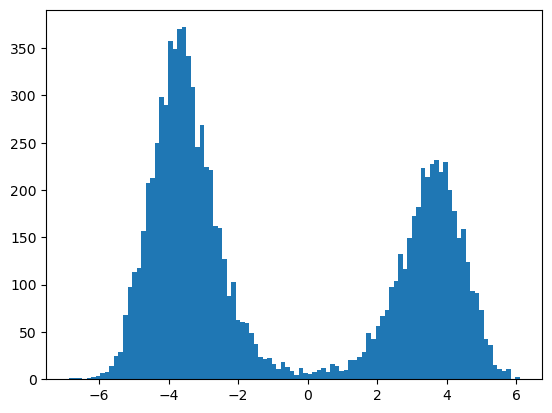

In [10]:
plt.hist(phi, bins=100)